# BioMED - Microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224

In [4]:
#%pip install transformers torch

In [1]:
import torch
import open_clip
from PIL import Image

In [2]:
model, preprocess, _ = open_clip.create_model_and_transforms("hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224")
tokenizer = open_clip.get_tokenizer("hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224")

In [3]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print("Device:", device)

model.to(device)
model.eval()

Device: cuda


CustomTextCLIP(
  (visual): TimmModel(
    (trunk): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=768, out_features=768, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=768

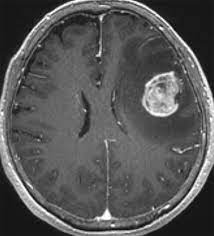

In [4]:
img_path = "../data/master_data/brain_xray.jpeg"
Image.open(img_path)

In [5]:
images = torch.stack([preprocess(Image.open(img_path))]).to(device)

In [6]:
# create dense vectors from the image URI
dense_embeds = model.encode_image(images)
dense_embeds[0]

tensor([-2.9789e+00, -1.4594e-01, -1.8713e+01, -5.5118e+00, -4.1241e+00,
        -4.7956e+00,  1.5211e+00, -1.6952e+00, -4.9282e+00, -3.9811e+00,
         3.9417e+00,  4.1488e+00, -1.5006e+00,  5.9753e+00,  7.5292e-01,
        -2.8595e-01, -5.0382e-01,  1.1617e+00, -2.0645e+00,  2.7581e+00,
         3.5821e+00, -8.8859e-01,  5.0141e+00, -8.4201e-01,  2.7661e+00,
        -1.2726e+00, -4.7853e+00,  4.2620e+00,  2.9004e+00, -3.5177e+00,
         9.7876e-01,  2.4095e+00,  4.7001e+00, -1.5904e+00, -3.5220e+00,
        -3.6390e+00,  1.6472e+00,  1.3200e+00, -4.8294e+00, -2.7503e+00,
         1.0133e+00,  1.4612e+00, -5.1731e-01,  5.8124e+00,  3.0170e+00,
         2.2676e+00, -1.5725e+00, -1.5758e+00, -2.2478e+00,  1.0247e+00,
        -3.5529e+00,  1.7469e+00,  1.5408e+00,  4.0967e-01, -3.6313e+00,
        -2.4398e+00,  1.7172e+00,  5.3915e+00,  1.6147e+00, -1.7002e+00,
        -2.7922e-01, -5.9629e+00,  1.0829e+00,  2.3641e+00, -5.0032e+00,
         2.3708e+00,  2.2454e+00, -2.6521e+00,  5.4

In [7]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

In [8]:
# Load the T5 model for text generation 
t5_model_name = "t5-base" 
t5_tokenizer = T5Tokenizer.from_pretrained(t5_model_name) 
t5_model = T5ForConditionalGeneration.from_pretrained(t5_model_name)

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [9]:
# Convert image embeddings to text using T5
def generate_text_from_embeddings(embeddings):
    # Create a placeholder input text for T5
    input_text = "describe the medical image"

    # Tokenize the input text
    input_ids = t5_tokenizer(input_text, return_tensors="pt").input_ids

    # Decode embeddings to text using T5
    outputs = t5_model.generate(input_ids=input_ids, encoder_outputs=embeddings)
    decoded_text = t5_tokenizer.decode(outputs[0], skip_special_tokens=True)

    return decoded_text

In [ ]:
# Generate text description
description = generate_text_from_embeddings(dense_embeds)
print("Description:", description)

ValueError: not enough values to unpack (expected 3, got 2)